# Lecture 11: Thyroid Example

In [1]:
# load imports
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
# load dataset
thyroid_df = pd.read_csv('thyroid_data.csv')

# look at the shape of data
thyroid_df.shape

(383, 17)

In [3]:
# look at dataframe
thyroid_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
# look at data on recurrence
thyroid_df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [5]:
# define list of column name to one hot encode
cols_to_exclude = ['Age', 'Recurred']

categorical_cols = [col for col in thyroid_df.columns if col not in cols_to_exclude]

categorical_cols

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [6]:
# define the one hot encoding format
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [7]:
# apply the transformer
transformed_data = column_transformer.fit_transform(thyroid_df)

transformed_data

array([[1.0, 0.0, 1.0, ..., 0.0, 27, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 34, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 30, 'No'],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 72, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 61, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 67, 'Yes']],
      shape=(383, 56), dtype=object)

In [8]:
pd.DataFrame(transformed_data).head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No


In [9]:
# get the list of column names
encoded_cols = column_transformer.named_transformers_['encoder'].get_feature_names_out(categorical_cols)
encoded_cols

array(['Gender_F', 'Gender_M', 'Smoking_No', 'Smoking_Yes',
       'Hx Smoking_No', 'Hx Smoking_Yes', 'Hx Radiothreapy_No',
       'Hx Radiothreapy_Yes', 'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', '

In [ ]:
# convert to a encoded column names to a list
encoded_cols = list(encoded_cols)

# add the age and recurred column names
encoded_cols.append('Age')
encoded_cols.append('Recurred')

encoded_cols

['Gender_F',
 'Gender_M',
 'Smoking_No',
 'Smoking_Yes',
 'Hx Smoking_No',
 'Hx Smoking_Yes',
 'Hx Radiothreapy_No',
 'Hx Radiothreapy_Yes',
 'Thyroid Function_Clinical Hyperthyroidism',
 'Thyroid Function_Clinical Hypothyroidism',
 'Thyroid Function_Euthyroid',
 'Thyroid Function_Subclinical Hyperthyroidism',
 'Thyroid Function_Subclinical Hypothyroidism',
 'Physical Examination_Diffuse goiter',
 'Physical Examination_Multinodular goiter',
 'Physical Examination_Normal',
 'Physical Examination_Single nodular goiter-left',
 'Physical Examination_Single nodular goiter-right',
 'Adenopathy_Bilateral',
 'Adenopathy_Extensive',
 'Adenopathy_Left',
 'Adenopathy_No',
 'Adenopathy_Posterior',
 'Adenopathy_Right',
 'Pathology_Follicular',
 'Pathology_Hurthel cell',
 'Pathology_Micropapillary',
 'Pathology_Papillary',
 'Focality_Multi-Focal',
 'Focality_Uni-Focal',
 'Risk_High',
 'Risk_Intermediate',
 'Risk_Low',
 'T_T1a',
 'T_T1b',
 'T_T2',
 'T_T3a',
 'T_T3b',
 'T_T4a',
 'T_T4b',
 'N_N0',
 'N_

In [ ]:
# convert transformed data to a dataframe
transformed_df = pd.DataFrame(transformed_data, columns=encoded_cols)

transformed_df

,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age,Recurred
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,72,Yes
379,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,81,Yes
380,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72,Yes
381,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61,Yes


In [16]:
transformed_df.shape

(383, 56)

In [ ]:
# make the X and y variables
X = transformed_df.drop('Recurred', axis=1)
y = transformed_df['Recurred']

X.shape, y.shape

((383, 55), (383,))

In [21]:
# do train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

X_train.shape

(283, 55)

In [22]:
# define the parameter grid
param_grid = {
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 8],
    'max_features': ['sqrt'],
    'n_estimators': [30, 60, 90]
}

In [24]:
# make the random forest classifier
rf_classifier = RandomForestClassifier()

# make the grid object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, scoring='accuracy')

In [28]:
# run the grid search
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_params

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 90}

In [29]:
best_score = grid_search.best_score_

best_score

np.float64(0.9576715612825891)

In [34]:
# define a model with best parameters
final_model = RandomForestClassifier(
    class_weight='balanced',
    criterion='gini',
    max_depth=4,
    max_features='sqrt',
    n_estimators=60
)

# fit the model on all training data
final_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=60)

In [35]:
# get model score
final_model.score(X_test, y_test)

0.95

In [40]:
# get feature importance
feature_importances = final_model.feature_importances_

feature_importances

array([6.90232065e-03, 6.71672494e-03, 1.90563247e-03, 5.54088495e-03,
       4.82391683e-04, 1.58520030e-03, 2.25474690e-03, 8.32916489e-18,
       1.09186766e-03, 1.11995430e-03, 3.29368214e-03, 1.47163822e-05,
       6.32250943e-04, 4.37201520e-18, 2.34156189e-03, 0.00000000e+00,
       3.80227072e-03, 3.09125085e-03, 8.99831598e-03, 1.74467325e-03,
       2.69878783e-03, 8.27780253e-02, 0.00000000e+00, 5.46978052e-04,
       5.02104774e-03, 2.53429580e-03, 2.81401518e-03, 1.60438721e-03,
       3.08615594e-03, 1.64683824e-02, 2.40504073e-02, 6.84006633e-02,
       1.31430063e-01, 2.16835894e-03, 1.34755988e-03, 7.02640461e-03,
       5.11288817e-03, 1.15845591e-03, 5.35924860e-03, 6.39142246e-03,
       7.49153150e-02, 6.19351880e-03, 4.06998629e-02, 6.79354287e-03,
       1.00708308e-04, 2.04412303e-02, 6.27690741e-03, 6.88371119e-05,
       3.08566006e-04, 4.78551190e-03, 1.05131114e-02, 1.22120251e-01,
       2.82731913e-02, 2.36407326e-01, 2.05861257e-02])

In [44]:
# convert to dataframe
feature_importance_df = pd.DataFrame({
    'feature': X.columns, 
    'importance': feature_importances
})

# sort the dataframe
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

feature_importance_df

,feature,importance
53,Response_Structural Incomplete,2.364073e-01
32,Risk_Low,1.314301e-01
51,Response_Excellent,1.221203e-01
21,Adenopathy_No,8.277803e-02
40,N_N0,7.491532e-02
31,Risk_Intermediate,6.840066e-02
42,N_N1b,4.069986e-02
52,Response_Indeterminate,2.827319e-02
30,Risk_High,2.405041e-02
54,Age,2.058613e-02


<Axes: xlabel='feature'>

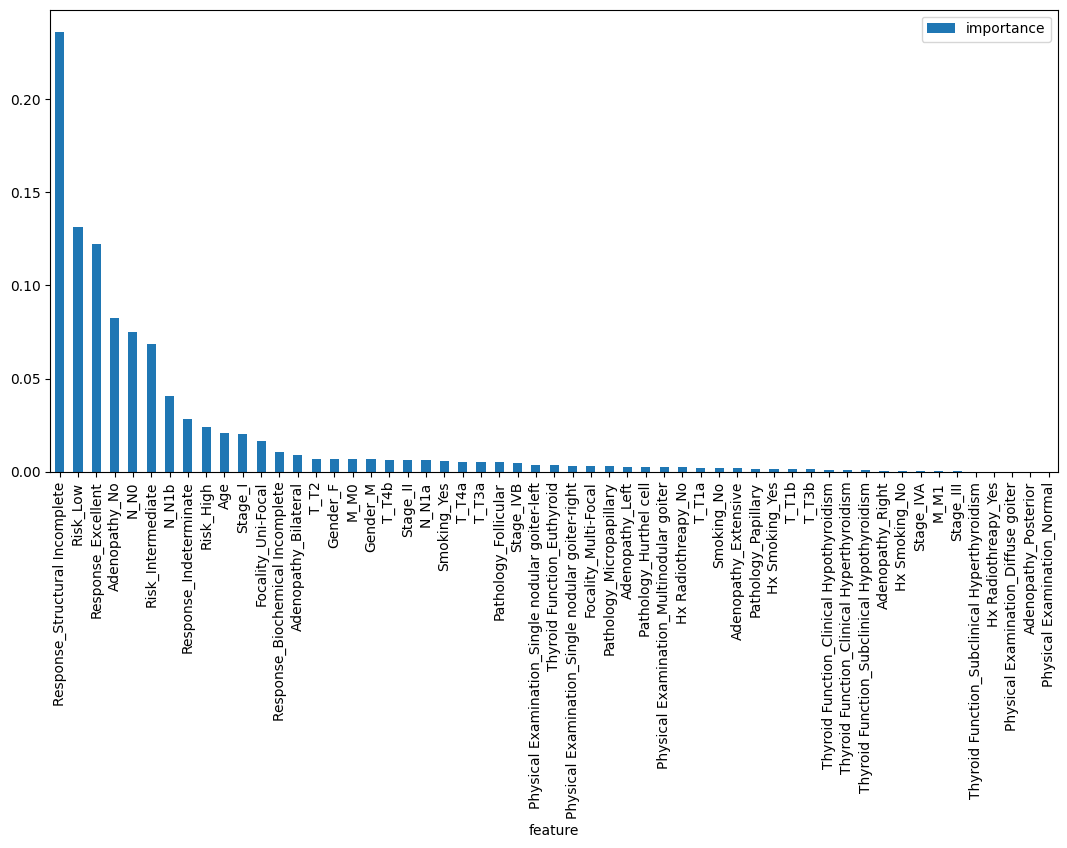

In [51]:
# plot the feature importance
feature_importance_df.plot.bar(x='feature', y='importance', figsize=(13, 6))